In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (10, 5)

df = pd.read_csv("Daily_m3_1315.csv", parse_dates=True)

df.drop(["meter location","DMA"], axis=1, inplace=True)

# Tämä vaatii, että negatiiviset arvot on täytetty aiemmin NaN-arvoilla 
df = df.fillna(-1) 
df = df.groupby("property").sum() # Ryhmittele rivit omaisuuden "property" perusteella ja laske summat
                                  # Negatiiviset arvot on täytetty aiemmin NaN-arvoilla

# NaN-arvot takaisin sarakkeisiin
num = df._get_numeric_data()
num[num < 0] = np.nan

df= df.T
df = df.assign(date=lambda x: x.index )
df['date'] = pd.to_datetime(df['date'])

# Luo vuositilastot
df_year =df.groupby(pd.Grouper(key="date", axis=0, freq="y")).sum()
display(df_year)

property,1,2,3,4,5,6,7,8,9,10,...,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160
date,,,,,,,,,,,,,,,,,,,,,
2012-12-31,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,117.842,104.062,71.471,69.993,137.598,122.806,109.179,24.540,2006.74,7.698
2013-12-31,29.393,33.559,30.601,13.361,46.862,23.606,58.786,48.499,34.226,8.525,...,185.824,128.101,95.366,91.164,187.569,178.191,151.756,58.445,15810.90,26.341
2014-12-31,76.819,103.523,71.135,52.438,131.185,102.484,205.521,171.336,88.865,24.800,...,133.323,120.637,83.252,93.555,175.430,167.657,153.646,60.536,18191.20,8.215
2015-12-31,7.164,14.095,8.159,5.735,14.949,11.380,23.378,19.350,12.754,3.054,...,51.108,37.674,26.878,28.971,50.970,43.512,53.083,18.367,6460.80,4.448


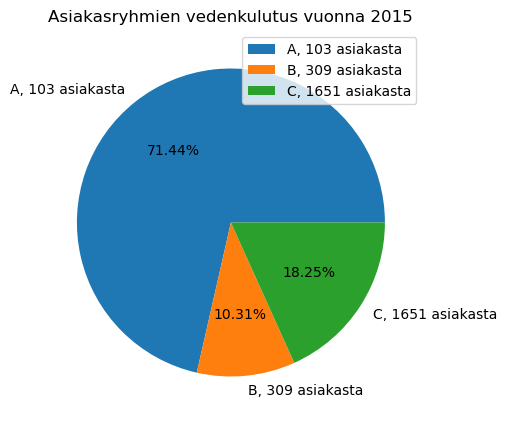

In [14]:
df_2015 = df_year.iloc[[3]]
#display(df_2015)
df_2015 = df_2015.T.sort_values(by="2015-12-31",ascending=False)
df_2015 = df_2015[~(df_2015 == 0.000).all(axis=1)] # Poistetaan rivit, joissa kaikki arvot ovat nollia
# print(len(df_2015))   tarkistetaan, että printtaa 2063, joten = A + B + C


# Asetetaan asiakkaat ("class") luokkiin A, B ja C sen perusteella, kuinka monta asiakasta kuhunkin luokkaan kuuluu
# Tässä luokkajaossa oletetaan, että ensimmäiset 103 asiakasta kuuluvat luokkaan A, seuraavat 309 asiakasta luokkaan B ja loput luokkaan C
df_2015['class'] = range(1, len(df_2015) + 1)
df_2015.iloc[0:103,1] = "A"
df_2015.iloc[103:412,1] = "B" # 309 + 103 = 412
df_2015.iloc[412:2126,1] = "C"
df_2015_class = df_2015.groupby(["class"]).agg(["count", "sum", "mean"])
df_2015_class.columns = df_2015_class.columns.droplevel(0)
df_2015_class.reset_index(inplace=True)

plt.pie(x=df_2015_class["sum"], labels=(df_2015_class["class"] + ", " + df_2015_class["count"].astype(str)) +" asiakasta", autopct = "%0.2f%%")
plt.title("Asiakasryhmien vedenkulutus vuonna 2015")
plt.legend(loc="upper right")
plt.show()